In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

In [65]:
covid_df = pd.read_csv('/Users/toddhendricks/Downloads/reported_hospital_capacity_admissions_facility-level_weekly_average_timeseries_20201207.csv')

In [66]:
covid_df.shape

(87369, 93)

In [67]:
covid_df

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_adult_covid_suspected_30-39_7_day_sum,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult_covid_suspected_60-69_7_day_sum,previous_day_admission_adult_covid_suspected_70-79_7_day_sum,previous_day_admission_adult_covid_suspected_80+_7_day_sum,previous_day_admission_adult_covid_suspected_unknown_7_day_sum,previous_day_admission_pediatric_covid_suspected_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum
0,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2020-11-27,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
1,36db6bad3679dfdcccc301fc608438109ad907943c702f...,2020-11-27,PR,NaN,CDT Susana Centeno,NaN,NaN,765.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,78.0,-999999.0
2,976b4ce7c95e1cd394112ce7762ed040f18a141e56a52e...,2020-11-27,PR,NaN,Hospital Industrial C.F.S.E,Paseo Dr. Jose Celso Barbosa,San Juan,935.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,44.0,-999999.0
3,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629e...,2020-11-27,LA,NaN,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,71303.0,Short Term,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f70d7abf93c78280583ac18e896e6737cca8212b017513...,2020-11-27,NV,NaN,Elite Medical Center,150 E Harmon Ave,Las Vegas,89109.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,80.0,-999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87364,400130,2020-07-31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,72141.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,35.0,NaN
87365,400115,2020-07-31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,72145.0,...,4.0,20.0,9.0,12.0,9.0,10.0,-999999.0,4.0,170.0,NaN
87366,400110,2020-07-31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,72153.0,...,-999999.0,-999999.0,-999999.0,4.0,-999999.0,-999999.0,-999999.0,-999999.0,274.0,NaN
87367,480002,2020-07-31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,78010.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,193.0,NaN


In [98]:
covid_df.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       'is_metro_micro', 'total_beds_7_day_avg',
       'all_adult_hospital_beds_7_day_avg',
       'all_adult_hospital_inpatient_beds_7_day_avg',
       'inpatient_beds_used_7_day_avg',
       'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
       'inpatient_beds_7_day_avg', 'total_icu_beds_7_day_avg',
       'total_staffed_adult_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg',
       'staffed_adult_icu_bed_occupancy_7_day_avg',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
       'staffed_icu_adult_p

In [68]:
weekly_df = covid_df.groupby('collection_week')['total_adult_patients_hospitalized_confirmed_covid_7_day_coverage'].sum().astype(int).dropna()

In [69]:
weekly_df.max()

33905

<AxesSubplot:xlabel='collection_week'>

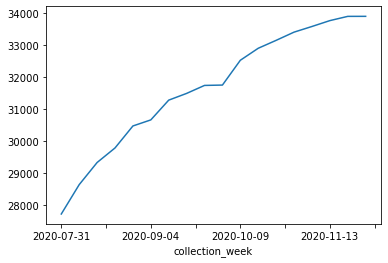

In [70]:
weekly_df.plot()

In [71]:
smaller_df = covid_df[cols]

In [72]:
cali_df = smaller_df[smaller_df.state == 'CA']

In [73]:
grouped_by_state = covid_df.groupby(['state'], as_index=False)['previous_day_admission_adult_covid_confirmed_7_day_sum'].count()

In [74]:
type(grouped_by_state)

pandas.core.frame.DataFrame

In [84]:
practices = smaller_df.groupby('state')['hospital_subtype'].value_counts()

In [88]:
unstacked = practices.unstack(level=1)

In [89]:
unstacked

hospital_subtype,Childrens Hospitals,Critical Access Hospitals,Long Term,Short Term
state,,,,
AK,NaN,126.0,18.0,124.0
AL,36.0,90.0,142.0,1440.0
AR,36.0,489.0,131.0,819.0
AZ,18.0,197.0,100.0,967.0
CA,180.0,643.0,359.0,5168.0
...,...,...,...,...
VT,NaN,139.0,NaN,105.0
WA,54.0,697.0,NaN,853.0
WI,36.0,1044.0,54.0,1146.0


In [100]:
short_term = covid_df.groupby(['hospital_subtype']).get_group('Short Term')

In [101]:
short_term

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_adult_covid_suspected_30-39_7_day_sum,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult_covid_suspected_60-69_7_day_sum,previous_day_admission_adult_covid_suspected_70-79_7_day_sum,previous_day_admission_adult_covid_suspected_80+_7_day_sum,previous_day_admission_adult_covid_suspected_unknown_7_day_sum,previous_day_admission_pediatric_covid_suspected_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum
0,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2020-11-27,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
1,36db6bad3679dfdcccc301fc608438109ad907943c702f...,2020-11-27,PR,NaN,CDT Susana Centeno,NaN,NaN,765.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,78.0,-999999.0
2,976b4ce7c95e1cd394112ce7762ed040f18a141e56a52e...,2020-11-27,PR,NaN,Hospital Industrial C.F.S.E,Paseo Dr. Jose Celso Barbosa,San Juan,935.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,44.0,-999999.0
3,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629e...,2020-11-27,LA,NaN,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,71303.0,Short Term,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f70d7abf93c78280583ac18e896e6737cca8212b017513...,2020-11-27,NV,NaN,Elite Medical Center,150 E Harmon Ave,Las Vegas,89109.0,Short Term,NaN,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,80.0,-999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87364,400130,2020-07-31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,72141.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,35.0,NaN
87365,400115,2020-07-31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,72145.0,...,4.0,20.0,9.0,12.0,9.0,10.0,-999999.0,4.0,170.0,NaN
87366,400110,2020-07-31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,72153.0,...,-999999.0,-999999.0,-999999.0,4.0,-999999.0,-999999.0,-999999.0,-999999.0,274.0,NaN
87367,480002,2020-07-31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,78010.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,193.0,NaN


In [102]:
def get_reversed_groups(df, col):
    for grp in df.groupby(col).groups:
        reverse_grp = grp[::-1]
        print(reverse_grp)

In [ ]:
get_reversed_groups(covid_df, '')